In [9]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load dataset
df = pd.read_csv("data/performance_dataset.csv")

# Ensure timestamp is numeric or datetime
df["timestamp"] = pd.to_numeric(df["timestamp"])


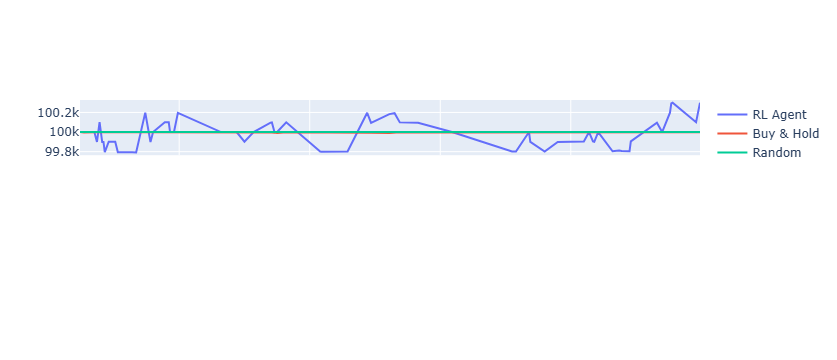

In [10]:
fig = make_subplots(
    rows=3,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.04
)

# --- Chart 1: Portfolio vs Benchmarks ---
fig.add_trace(
    go.Scatter(
        x=df["timestamp"],
        y=df["agent_portfolio_value"],
        mode="lines",
        name="RL Agent"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["timestamp"],
        y=df["benchmark_buy_hold_value"],
        mode="lines",
        name="Buy & Hold"
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["timestamp"],
        y=df["benchmark_random_value"],
        mode="lines",
        name="Random"
    ),
    row=1, col=1
)


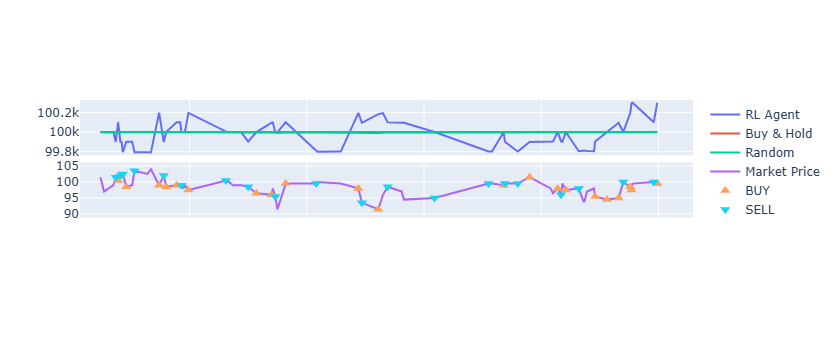

In [11]:
# Price line
fig.add_trace(
    go.Scatter(
        x=df["timestamp"],
        y=df["price"],
        mode="lines",
        name="Market Price"
    ),
    row=2, col=1
)

# BUY actions
buy_df = df[df["action"] == "BUY"]
sell_df = df[df["action"] == "SELL"]

fig.add_trace(
    go.Scatter(
        x=buy_df["timestamp"],
        y=buy_df["price"],
        mode="markers",
        marker=dict(symbol="triangle-up", size=9),
        name="BUY"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=sell_df["timestamp"],
        y=sell_df["price"],
        mode="markers",
        marker=dict(symbol="triangle-down", size=9),
        name="SELL"
    ),
    row=2, col=1
)



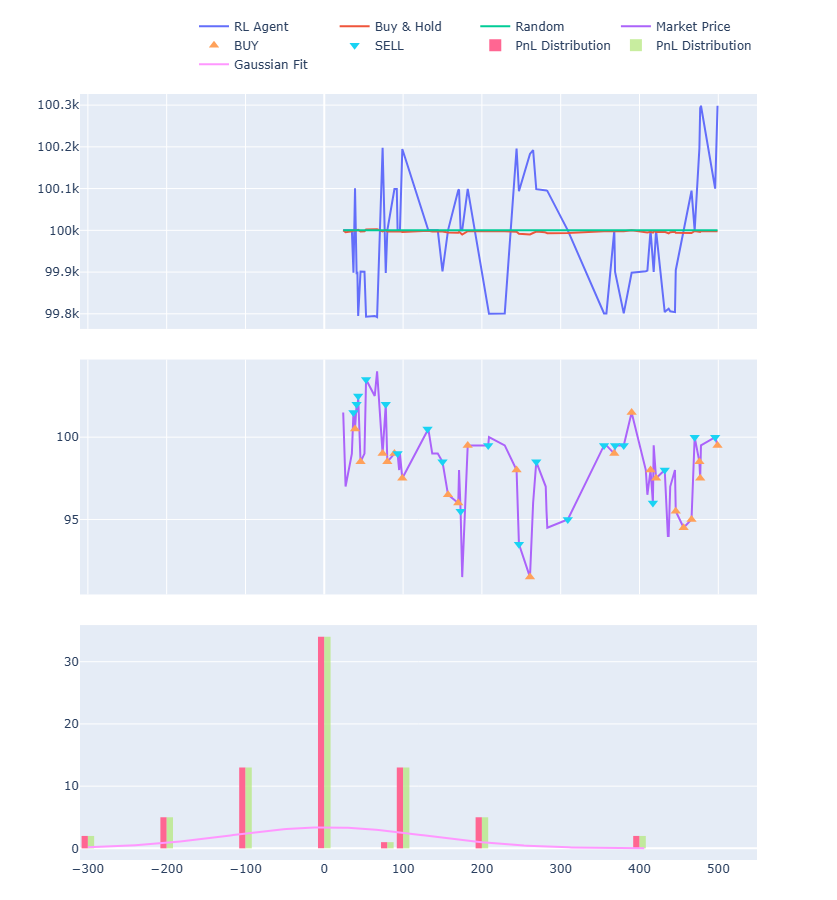

In [14]:
import numpy as np
from scipy.stats import norm

# --- Histogram ---
fig.add_trace(
    go.Histogram(
        x=df["pnl_step"],
        nbinsx=50,
        name="PnL Distribution",
        opacity=0.75
    ),
    row=3, col=1
)

# --- Gaussian Overlay ---
pnl = df["pnl_step"]

x = np.linspace(pnl.min(), pnl.max(), 200)
pdf = norm.pdf(x, pnl.mean(), pnl.std())

# Scale PDF to histogram height
pdf = pdf * len(pnl) * (pnl.max() - pnl.min()) / 50

fig.add_trace(
    go.Scatter(
        x=x,
        y=pdf,
        mode="lines",
        name="Gaussian Fit"
    ),
    row=3, col=1
)


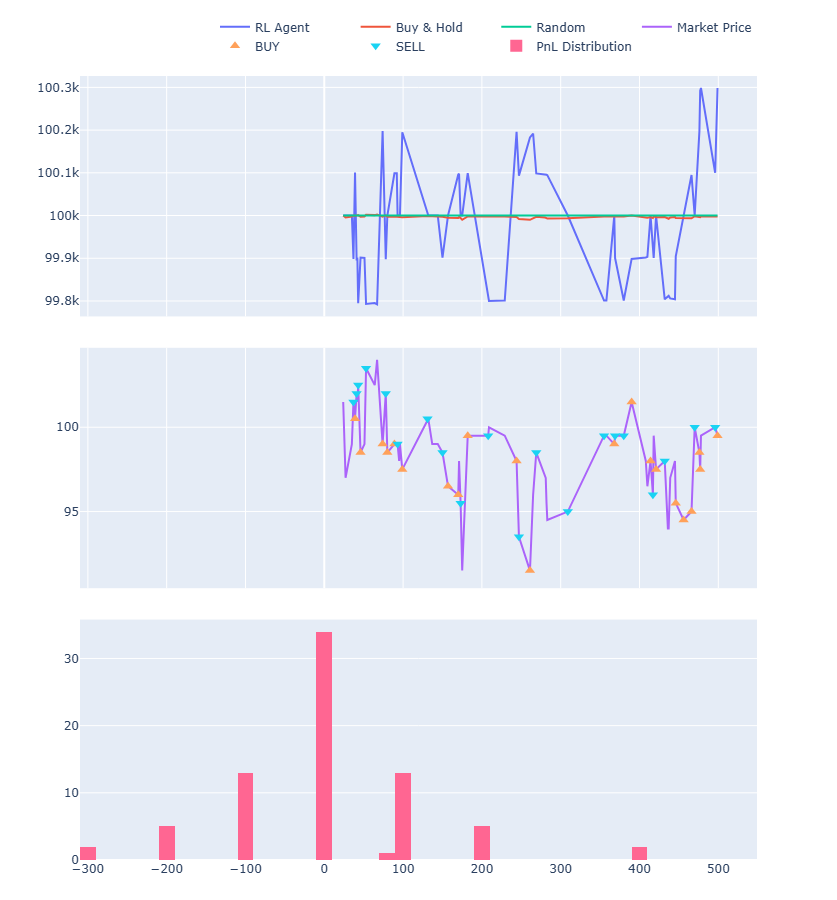

In [13]:
fig.update_layout(
    height=900,
    hovermode="x unified",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    margin=dict(t=40, b=40)
)

fig.show()
